In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os

os.chdir('/content/drive/My Drive/unet')
print(os.getcwd())

/content/drive/My Drive/unet


In [7]:
!cp -r "/content/drive/My Drive/unet/Test/images" "/content/drive/My Drive/unet/Test/images_sprint19"

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-92f1aa7fdd73>", line 1, in <module>
    get_ipython().system('cp -r "/content/drive/My Drive/unet/Test/images" "/content/drive/My Drive/unet/Test/images_sprint19"')
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_shell.py", line 96, in system
    output = _system_commands._system_compat(self, *args, **kwargs)  # pylint:disable=protected-access
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 438, in _system_compat
    shell.var_expand(cmd, depth=2), clear_streamed_output=False)
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 195, in _run_command
    return _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget)
  File "/usr/lib/python3.6/contextlib.py", line 88, in __exit__

KeyboardInterrupt: ignored

### 【問題1】学習・推定 
以下のKeras実装を使用して学習・推定を行ってください。
zhixuhao/unet: unet for image segmentation
《GPU環境での学習》
大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。
《新たなデータセットの適用》
公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

In [2]:
import os

os.chdir('/content/drive/My Drive/unet/Test/images_sprint19')
print(os.getcwd())

/content/drive/My Drive/unet/Test/images_sprint19


In [0]:
!rm a* b* c* d* e* f*

In [13]:
  !python main_sprint19.py

Using TensorFlow backend.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/content/drive/My Drive/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.


2019-10-30 08:42:36.632793: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-10-30 08:42:36.633125: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1d88bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-10-30 08:42:36.633163: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-10-30 08:42:36.636

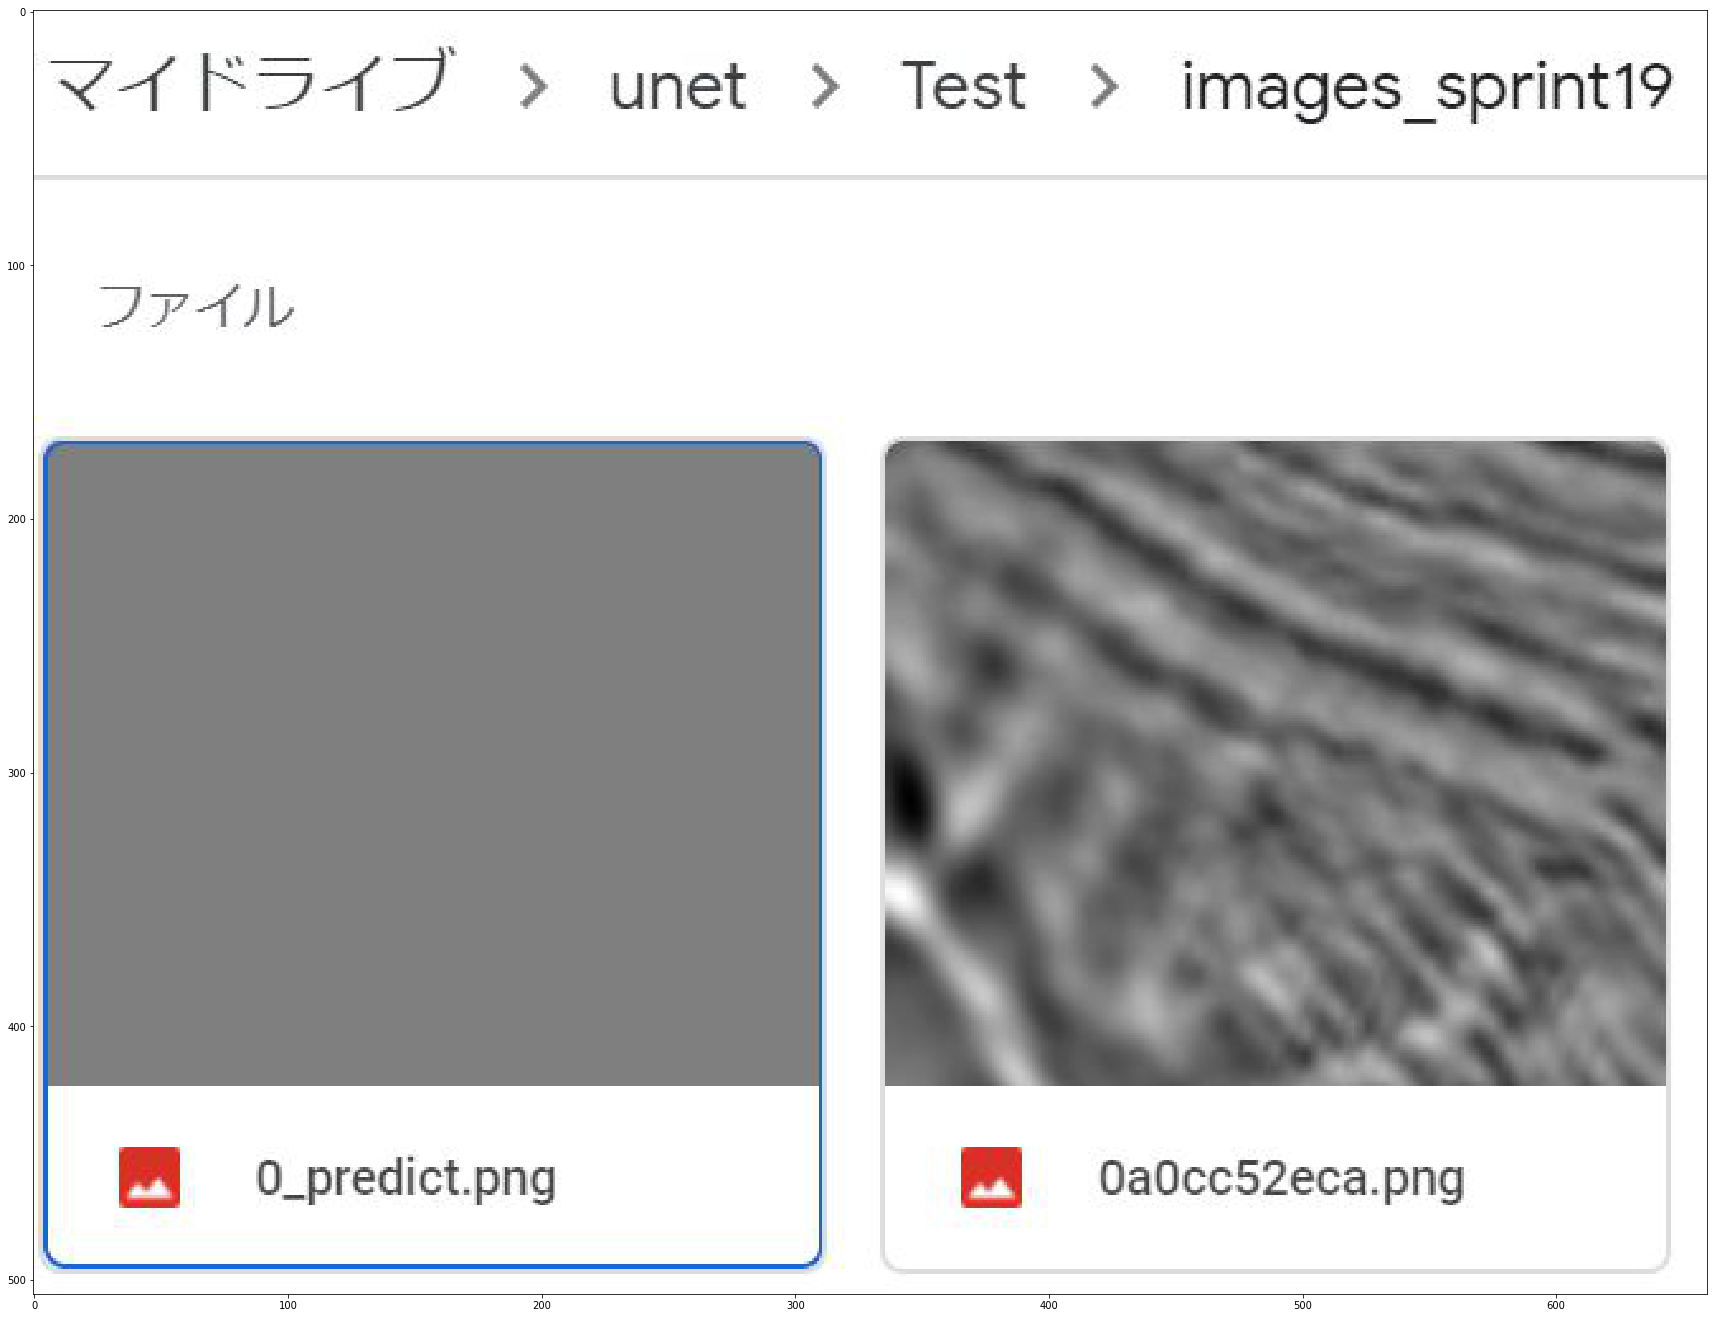

In [8]:
#推定、結果
#上がテスト画像、下がセグメンテーション画像です

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

im = Image.open(r"C:\Users\anai\dive\TEST_upload3\diveintocode-ml\Sprint19_UNET_Result.jpg")
im_list = np.asarray(im)
plt.figure(figsize=(30, 30))
plt.imshow(im_list)
plt.show()

### 【問題2】コードリーディング 
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

#### 畳み込み、ダウンサンプリング¶
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
上記の処理で、畳み込みおよびダウンサンプリングを行なっている。
これだけだと通常のCNNのように見える

#### 最終畳み込み、ドロップアウト
 conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
 conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
 drop5 = Dropout(0.5)(conv5)
上記が最終のダウンサンプリングの畳み込み、ドロップアウトの処理も行なっている。

#### アップサンプリング、結合
up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
Upsampling2Dでアップサンプリングの処理を行なっている。
その上で畳み込みをしている


merge6 = concatenate([drop4,up6], axis = 3)


ダウンサンプリングで保存した特徴量マップを結合させている


conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)


その後通常の畳み込み

#### 最後の活性化関数¶
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)
畳み込みの出力チャネルをクラス数にし、sigmoid関数で二値分類を行なっている

#### モデル作成
model = Model(input = inputs, output = conv10)
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
最後にModel関数でkerasのモデルとして保存
コンパイルで最適化手法、ロスの計算方法を指定して


return model


モデルを返している